### Doble reducción de dimensionalidad

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('dataset.csv')

In [ ]:
df = df.drop(columns = ['Unnamed: 0'])

In [17]:
df.head()

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610009B14Rik,0610009B22Rik,0610009D07Rik,...,Zwilch,Zwint,Zxda,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,l7Rn6
1551,0,309,0,0,0,0,0,0,0,253,...,0,0,0,0,0,0,397,0,0,0
1145,0,122,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3178,0,213,129,0,0,75,0,0,0,56,...,0,0,0,0,0,0,3,22,0,0
4895,0,0,97,0,0,0,0,0,0,35,...,0,0,0,0,16,0,114,4,0,0
2137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,56,0,3,22


### Escalamos los datos son StandardScaler

In [18]:
scaler = StandardScaler().fit(df)
df_scaled = scaler.transform(df)

### Escalamos primeramente con PCA para realizar una reducción. Aunque este algoritmo es de los más sencillos, su implementación ofrece una ventaja: la varianza explicada. Podemos saber que tantos componentes necesitamos para conservar, por ejemplo, el 95% de la varianza. Al ser relativamente barato computacionalmente comparado con t-SNE o UMAP, podemos "deshacernos" de varias dimensiones o componentes antes de utilizar alguno de estos últimos algoritmos.

In [20]:
pca = PCA().fit(df_scaled)

In [23]:
np.cumsum(pca.explained_variance_ratio_)[0:2900]

array([0.05407745, 0.07348064, 0.08797517, ..., 0.95250377, 0.95256566,
       0.95262742])

### En este caso, con 2900 componentes nos quedamos con el 95% de la varianza. Así, podemos bajar de 17217 dimensiones a tan solo 2900. Procedemos a transformar los datos.

In [25]:
pca = PCA(n_components = 2900).fit(df_scaled)

In [27]:
df_reduced = pca.transform(df_scaled)

Un vistazo a las primeras dos componentes:

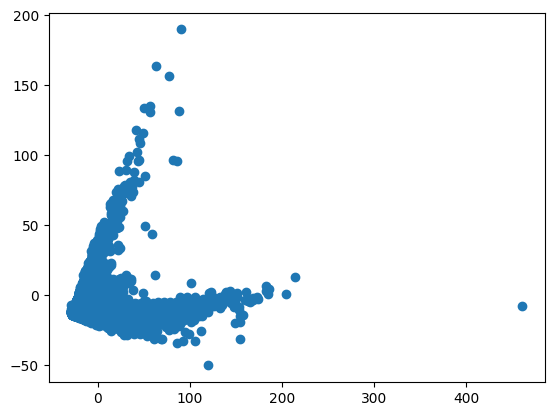

In [28]:
plt.scatter(x=df_reduced[:,0], y=df_reduced[:,1])

### Utilizamos ahora un algoritmo pesado sobre los datos previamente procesados con PCA (dimensión 2900)

In [153]:
df_reduced_tsne = TSNE(n_components = 2, perplexity = 25, early_exaggeration=30).fit_transform(df_reduced)

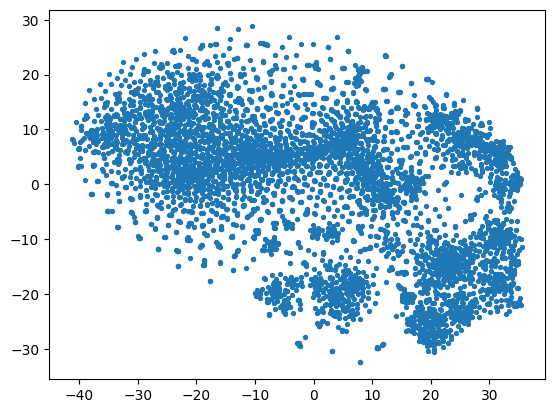

In [155]:
plt.scatter(x = df_reduced_tsne[:,0], y = df_reduced_tsne[:,1], s= 8)

### Apliquemos ahora un algoritmo de clustering

In [159]:
kmeans = KMeans(n_clusters= 4).fit(df_reduced_tsne)

In [160]:
kmeans.labels_

array([2, 2, 0, ..., 2, 1, 0])

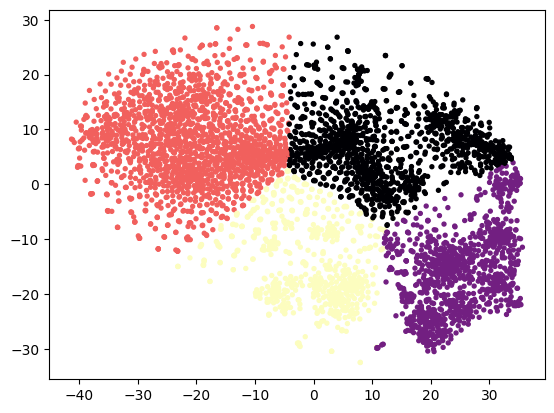

In [161]:
plt.scatter(x = df_reduced_tsne[:,0], y = df_reduced_tsne[:,1], s= 8, c = kmeans.labels_, cmap='magma')

### Posteriormente, podemos agregar las etiquetas a los datos originales:

In [162]:
df['type'] = kmeans.labels_

In [163]:
df.head()

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610009B14Rik,0610009B22Rik,0610009D07Rik,...,Zwint,Zxda,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,l7Rn6,type
1551,0,309,0,0,0,0,0,0,0,253,...,0,0,0,0,0,397,0,0,0,2
1145,0,122,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3178,0,213,129,0,0,75,0,0,0,56,...,0,0,0,0,0,3,22,0,0,0
4895,0,0,97,0,0,0,0,0,0,35,...,0,0,0,16,0,114,4,0,0,0
2137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,56,0,3,22,0


### Ya podemos hacer análisis por clasificación